## Endogenous parameter estimates (A-Matrix)

In [1]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
from glob import glob
from scipy.stats import ttest_1samp, wilcoxon, mannwhitneyu
from scipy import stats
from statsmodels.stats.descriptivestats import sign_test
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import pingouin as pg
#from multipy.fdr import lsu
%matplotlib inline

### 1. Group-level results, separated for RH-nM, RH-M, LH-nM and across all subs
### 2. Group-related differences in enogenous connectivity (task-independent, "resting state")


#### read out parameters for each connection and participant, convert to pandas dataframe, perform statistics

In [2]:
# index = 20 --> Anz.participants
# 14 endogenous connections (without intrinsic cons of PP, PT)
con_params_A_matrix = pd.DataFrame(columns=['participant', 'group', 'HG_l → HG_l', 'HG_l → PP_l', 'HG_l → PT_l', 
                                   'HG_l → HG_r', 'HG_r → HG_r', 'HG_r → PP_r', 'HG_r → PT_r', 'HG_r → HG_l',
                                   'PP_l → HG_l', 'PP_r → HG_r', 'PT_l → HG_l', 'PT_l → PT_r', 'PT_r → HG_r', 'PT_r → PT_l'], index=range(0,20))

In [3]:
# function global itself does not sort output!
list_matrices = sorted(glob('/home/benedikt/Desktop/AB-matrices/A_matrices_all_subjects/sub_*_A_matrix.mat'))
list_matrices

['/home/benedikt/Desktop/AB-matrices/A_matrices_all_subjects/sub_02_A_matrix.mat',
 '/home/benedikt/Desktop/AB-matrices/A_matrices_all_subjects/sub_03_A_matrix.mat',
 '/home/benedikt/Desktop/AB-matrices/A_matrices_all_subjects/sub_04_A_matrix.mat',
 '/home/benedikt/Desktop/AB-matrices/A_matrices_all_subjects/sub_05_A_matrix.mat',
 '/home/benedikt/Desktop/AB-matrices/A_matrices_all_subjects/sub_06_A_matrix.mat',
 '/home/benedikt/Desktop/AB-matrices/A_matrices_all_subjects/sub_07_A_matrix.mat',
 '/home/benedikt/Desktop/AB-matrices/A_matrices_all_subjects/sub_08_A_matrix.mat',
 '/home/benedikt/Desktop/AB-matrices/A_matrices_all_subjects/sub_11_A_matrix.mat',
 '/home/benedikt/Desktop/AB-matrices/A_matrices_all_subjects/sub_12_A_matrix.mat',
 '/home/benedikt/Desktop/AB-matrices/A_matrices_all_subjects/sub_13_A_matrix.mat',
 '/home/benedikt/Desktop/AB-matrices/A_matrices_all_subjects/sub_14_A_matrix.mat',
 '/home/benedikt/Desktop/AB-matrices/A_matrices_all_subjects/sub_15_A_matrix.mat',
 '/h

In [4]:
# sub 09, 10, 18 not estimated due to threshold --> 20 subjects left
list_participants = []

for part in range(2,25):
    if part == 9:
        continue
    if part == 10:
        continue
    if part == 18:
        continue    
    elif part < 10:
        list_participants.append('sub_0%s' % str(part))
    elif part >= 10:
        list_participants.append('sub_%s' % str(part))

In [5]:
# sub 09, 10, 18 not estimated due to threshold --> 20 subjects left
# right handed non-musicians: 02, 05, 06, 08, 14, 16, 19, 22, 24 (09, 10)
# right handed musicians: 03, 04, 07, 11, 12, 17, 21 (18)
# left handed non-musicians: 13, 15, 20, 23

list_group = ['RH_nM','RH_M','RH_M','RH_nM','RH_nM','RH_M','RH_nM','RH_M','RH_M','LH_nM','RH_nM','LH_nM','RH_nM','RH_M','RH_nM','LH_nM','RH_M','RH_nM','LH_nM','RH_nM']
con_params_A_matrix['group'] = list_group


In [6]:
con_params_A_matrix['participant'] = list_participants


In [7]:
list_HG_l_HG_l = []
list_HG_l_PP_l = []
list_HG_l_PT_l = []
list_HG_l_HG_r = []
list_HG_r_HG_r = []
list_HG_r_PP_r = []
list_HG_r_PT_r = []
list_HG_r_HG_l = []
list_PP_l_HG_l = []
list_PP_r_HG_r = []
list_PT_l_HG_l = []
list_PT_l_PT_r = []
list_PT_r_HG_r = []
list_PT_r_PT_l = []

In [8]:
for mat, part in zip(list_matrices, list_participants):
     
    
    
    part_df = loadmat(mat)['%s_A_matrix' % part]  
    
    list_HG_l_HG_l.append(part_df[0,0])
    list_HG_l_PP_l.append(part_df[4,0])
    list_HG_l_PT_l.append(part_df[2,0])
    list_HG_l_HG_r.append(part_df[1,0])
    list_HG_r_HG_r.append(part_df[1,1])
    list_HG_r_PP_r.append(part_df[5,1])
    list_HG_r_PT_r.append(part_df[3,1])
    list_HG_r_HG_l.append(part_df[0,1])
    list_PP_l_HG_l.append(part_df[0,4])
    list_PP_r_HG_r.append(part_df[1,5])
    list_PT_l_HG_l.append(part_df[0,2])
    list_PT_l_PT_r.append(part_df[3,2])
    list_PT_r_HG_r.append(part_df[1,3])
    list_PT_r_PT_l.append(part_df[2,3])

    list_connections = [list_HG_l_HG_l, list_HG_l_PP_l, list_HG_l_PT_l, list_HG_l_HG_r, list_HG_r_HG_r, list_HG_r_PP_r,
                    list_HG_r_PT_r, list_HG_r_HG_l, list_PP_l_HG_l, list_PP_r_HG_r, list_PT_l_HG_l, list_PT_l_PT_r,
                    list_PT_r_HG_r, list_PT_r_PT_l]
    
for key, con in zip(con_params_A_matrix.keys()[2:,], list_connections):

    con_params_A_matrix[key] = con



In [9]:
# reihenfolge regionen in matrizen: lhHg, rhHG, lhPT, rhPT, lhPP, rhPP:

#  HG_l_HG_l HG_r_HG_l PT_l_HG_l PT_r_HG_l PP_l_HG_l PP_r_HG_l
#  HG_l_HG_r HG_r_HG_r ...
#  HG_l_PT_l HG_r_PT_l ...
#  HG_l_PT_r HG_r_PT_r ...
#  HG_l_PP_l HG_r_PP_l ...
#  HG_l_PP_r HG_r_PP_r ...  

# e.g., sub_02_A_matrix =

#   0.13379   0.73619  -0.47087   0.00000   0.04127   0.00000
#   0.66210   0.72644   0.00000   0.98042   0.00000  -0.63291
#   0.29771   0.00000  -1.06057   0.01730   0.00000   0.00000
#   0.00000  -0.38466  -0.26690  -0.37029   0.00000   0.00000
#   0.08126   0.00000   0.00000   0.00000  -0.34501   0.00000
#   0.00000   0.38057   0.00000   0.00000   0.00000  -0.92071

con_params_A_matrix

,participant,group,HG_l → HG_l,HG_l → PP_l,HG_l → PT_l,HG_l → HG_r,HG_r → HG_r,HG_r → PP_r,HG_r → PT_r,HG_r → HG_l,PP_l → HG_l,PP_r → HG_r,PT_l → HG_l,PT_l → PT_r,PT_r → HG_r,PT_r → PT_l
0,sub_02,RH_nM,0.133794,0.081264,0.297711,0.662102,0.726439,0.380572,-0.384664,0.736187,0.041267,-0.632909,-0.470872,-0.266898,0.980423,0.017304
1,sub_03,RH_M,-0.017613,0.197596,0.048779,-0.038282,-0.142213,-0.083070,0.611834,0.379410,-0.007391,-0.054908,-0.432490,-0.395909,0.061843,0.480833
2,sub_04,RH_M,-0.242800,0.704183,-0.727693,0.907150,-0.137011,0.298483,0.458990,-0.099403,-0.825694,-0.001366,-0.534490,0.481537,-0.009138,0.045806
3,sub_05,RH_nM,-0.085500,0.047463,0.012330,-0.077852,-0.107768,0.064846,0.246993,0.164331,0.041196,-0.059675,-0.099190,-0.020194,0.088495,0.129845
4,sub_06,RH_nM,0.096144,0.374697,0.500864,0.211613,0.433458,-0.136872,1.129431,0.986160,-0.924621,1.049341,-0.654061,-0.102512,-0.885114,-0.070075
5,sub_07,RH_M,-0.360422,0.322342,0.232027,-0.006351,-0.046501,0.028299,0.595986,0.411164,-0.142123,-0.228531,-0.416444,-0.499090,-0.288989,-0.145372
6,sub_08,RH_nM,0.000229,0.010624,0.008366,0.008454,0.000873,0.008804,0.008903,0.007923,0.008239,0.007873,0.007456,0.007847,0.008105,0.008759
7,sub_11,RH_M,0.318530,-0.250389,-0.450706,0.464325,0.869941,0.018914,0.214581,0.727793,0.198619,-0.061380,0.180235,0.029798,-0.250323,-0.148363
8,sub_12,RH_M,0.272242,-0.060194,0.654138,0.332906,-0.776220,0.821773,0.432947,0.222153,-0.126035,0.096888,-0.216036,-0.801659,0.169237,-0.198828
9,sub_13,LH_nM,-0.460156,0.263847,1.434181,0.007792,-0.380180,0.070279,0.672780,0.058957,0.787045,-0.757025,-0.112022,0.157853,0.477032,0.723219


In [10]:
# sort data frame after groups and split into 3 separated frames
sorted_file = con_params_A_matrix.sort_values('group')

con_params_A_matrix_lhnm = sorted_file.iloc[0:4]
con_params_A_matrix_rhm = sorted_file.iloc[4:11]
con_params_A_matrix_rhnm = sorted_file.iloc[11:,]

display(con_params_A_matrix_rhm)
display(con_params_A_matrix_rhnm)
display(con_params_A_matrix_lhnm)

,participant,group,HG_l → HG_l,HG_l → PP_l,HG_l → PT_l,HG_l → HG_r,HG_r → HG_r,HG_r → PP_r,HG_r → PT_r,HG_r → HG_l,PP_l → HG_l,PP_r → HG_r,PT_l → HG_l,PT_l → PT_r,PT_r → HG_r,PT_r → PT_l
1,sub_03,RH_M,-0.017613,0.197596,0.048779,-0.038282,-0.142213,-0.083070,0.611834,0.379410,-0.007391,-0.054908,-0.432490,-0.395909,0.061843,0.480833
2,sub_04,RH_M,-0.242800,0.704183,-0.727693,0.907150,-0.137011,0.298483,0.458990,-0.099403,-0.825694,-0.001366,-0.534490,0.481537,-0.009138,0.045806
16,sub_21,RH_M,0.527167,0.385239,0.172864,0.383668,-0.370430,0.493009,1.189218,-0.206213,-0.022786,-0.895780,0.573031,-0.280749,-0.287344,0.068535
5,sub_07,RH_M,-0.360422,0.322342,0.232027,-0.006351,-0.046501,0.028299,0.595986,0.411164,-0.142123,-0.228531,-0.416444,-0.499090,-0.288989,-0.145372
7,sub_11,RH_M,0.318530,-0.250389,-0.450706,0.464325,0.869941,0.018914,0.214581,0.727793,0.198619,-0.061380,0.180235,0.029798,-0.250323,-0.148363
8,sub_12,RH_M,0.272242,-0.060194,0.654138,0.332906,-0.776220,0.821773,0.432947,0.222153,-0.126035,0.096888,-0.216036,-0.801659,0.169237,-0.198828
13,sub_17,RH_M,-0.000027,0.008678,0.008423,0.006662,0.001188,0.009733,0.008978,0.006725,0.007057,0.008032,0.007270,0.008365,0.008164,0.007438


,participant,group,HG_l → HG_l,HG_l → PP_l,HG_l → PT_l,HG_l → HG_r,HG_r → HG_r,HG_r → PP_r,HG_r → PT_r,HG_r → HG_l,PP_l → HG_l,PP_r → HG_r,PT_l → HG_l,PT_l → PT_r,PT_r → HG_r,PT_r → PT_l
17,sub_22,RH_nM,-0.027038,0.129958,0.109896,-0.050122,-0.082099,0.313788,0.341265,0.073785,0.024428,-0.023131,0.023521,-0.013952,0.306591,0.163481
14,sub_19,RH_nM,0.139309,-0.077709,0.319027,0.241382,-0.049424,-0.009830,0.316584,0.090229,0.157767,-1.255548,0.628539,1.139913,0.081341,-0.092929
0,sub_02,RH_nM,0.133794,0.081264,0.297711,0.662102,0.726439,0.380572,-0.384664,0.736187,0.041267,-0.632909,-0.470872,-0.266898,0.980423,0.017304
10,sub_14,RH_nM,0.336826,1.048532,0.436495,0.768406,-0.906098,0.967723,-0.492379,0.594977,-0.055944,-1.075034,-0.493707,-0.105424,-0.292207,-0.374449
6,sub_08,RH_nM,0.000229,0.010624,0.008366,0.008454,0.000873,0.008804,0.008903,0.007923,0.008239,0.007873,0.007456,0.007847,0.008105,0.008759
4,sub_06,RH_nM,0.096144,0.374697,0.500864,0.211613,0.433458,-0.136872,1.129431,0.986160,-0.924621,1.049341,-0.654061,-0.102512,-0.885114,-0.070075
3,sub_05,RH_nM,-0.085500,0.047463,0.012330,-0.077852,-0.107768,0.064846,0.246993,0.164331,0.041196,-0.059675,-0.099190,-0.020194,0.088495,0.129845
12,sub_16,RH_nM,0.000143,0.008943,0.007829,0.007491,-0.000081,0.007767,0.008611,0.007149,0.008237,0.007031,0.007527,0.007676,0.008613,0.007523
19,sub_24,RH_nM,-0.000421,0.009267,0.007847,0.007858,0.000762,0.008275,0.009117,0.007079,0.007665,0.008658,0.008044,0.007386,0.007213,0.007573


,participant,group,HG_l → HG_l,HG_l → PP_l,HG_l → PT_l,HG_l → HG_r,HG_r → HG_r,HG_r → PP_r,HG_r → PT_r,HG_r → HG_l,PP_l → HG_l,PP_r → HG_r,PT_l → HG_l,PT_l → PT_r,PT_r → HG_r,PT_r → PT_l
9,sub_13,LH_nM,-0.460156,0.263847,1.434181,0.007792,-0.380180,0.070279,0.672780,0.058957,0.787045,-0.757025,-0.112022,0.157853,0.477032,0.723219
15,sub_20,LH_nM,1.584563,-0.550238,-0.654237,0.884590,-0.555527,-0.222567,0.203441,0.088709,1.913377,0.428928,1.056007,-0.410478,-1.029647,0.395643
18,sub_23,LH_nM,0.000589,0.009610,0.007891,0.007316,0.001074,0.008261,0.007576,0.005981,0.007404,0.007834,0.008206,0.008327,0.006978,0.007453
11,sub_15,LH_nM,-0.053171,0.057887,0.037774,0.029161,0.034128,0.148744,-0.132150,-0.144458,-0.245267,0.085716,-0.143991,-0.119751,0.124528,0.020755


### 1. Group-level results, separated for RH-nM, RH-M, LH-nM and analysis across all subs

### endogenous statistical analysis: right-handed non-musicians (rhnm)

In [11]:
index_A_matrix = con_params_A_matrix_rhnm.keys()[2:,]

#### testing on normal distribution via shapiro

In [12]:
# "shapiro-wilk-signifikanztest für kleine stichprobengrößen"
con_params_A_matrix_rhnm_shapiro = pd.DataFrame(columns=['statistic', 'p value', 'norm'], index=index_A_matrix)

In [13]:
list_rhnm_shap_t = []
list_rhnm_shap_p = []
list_rhnm_shap_norm = []

In [14]:
index_A_matrix

Index(['HG_l → HG_l', 'HG_l → PP_l', 'HG_l → PT_l', 'HG_l → HG_r',
       'HG_r → HG_r', 'HG_r → PP_r', 'HG_r → PT_r', 'HG_r → HG_l',
       'PP_l → HG_l', 'PP_r → HG_r', 'PT_l → HG_l', 'PT_l → PT_r',
       'PT_r → HG_r', 'PT_r → PT_l'],
      dtype='object')

In [15]:
# stats.shapiro (scipy): performs the Shapiro-Wilk test for normality.
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution
# Statistik über sämtliche parameter innerhalb einer Verbindung (als key gesetzt)
for con in con_params_A_matrix_rhnm.keys()[2:,]:
    
    list_rhnm_shap_t.append(round(stats.shapiro(con_params_A_matrix_rhnm[con])[0], 12))
    list_rhnm_shap_p.append(round(stats.shapiro(con_params_A_matrix_rhnm[con])[1], 12))
    
for p in list_rhnm_shap_p:
    if p > 0.05:
        list_rhnm_shap_norm.append('True')
    else:
        list_rhnm_shap_norm.append('False')

In [16]:
con_params_A_matrix_rhnm_shapiro['statistic'] = list_rhnm_shap_t
con_params_A_matrix_rhnm_shapiro['p value'] = list_rhnm_shap_p
con_params_A_matrix_rhnm_shapiro['norm'] = list_rhnm_shap_norm

In [17]:
# wenn p-wert kleiner 0.05, dann stichprobendaten nicht normalverteilt, d.h. H0 abgelehnt ("es gibt also signifikanten unterschied")
con_params_A_matrix_rhnm_shapiro

,statistic,p value,norm
HG_l → HG_l,0.887703,0.188939,True
HG_l → PP_l,0.676226,0.000748,False
HG_l → PT_l,0.830595,0.045347,False
HG_l → HG_r,0.800900,0.020910,False
HG_r → HG_r,0.860656,0.097472,True
HG_r → PP_r,0.774900,0.010521,False
HG_r → PT_r,0.907339,0.297695,True
HG_r → HG_l,0.786188,0.014188,False
PP_l → HG_l,0.549371,0.000024,False
PP_r → HG_r,0.891191,0.205224,True


#### non-parametric testing via wilcoxon

In [18]:
# non-parametric wilcoxon-test
con_params_A_matrix_rhnm_wilcoxon_stats = pd.DataFrame(columns=['statistic', 'p value'], index=index_A_matrix)

In [19]:
list_rhnm_wilcoxon_stats = []
list_rhnm_wilcoxon_p = []

In [20]:
# Statistik über sämtliche parameter der subs innerhalb einer Verbindung (als key gesetzt)
for con in con_params_A_matrix_rhnm.keys()[2:,]:
    
    list_rhnm_wilcoxon_stats.append(round(stats.wilcoxon(con_params_A_matrix_rhnm[con] - 0)[0], 12))
    list_rhnm_wilcoxon_p.append(round(stats.wilcoxon(con_params_A_matrix_rhnm[con] - 0)[1], 12))
    
#for p in list_rhnm_shap_p:
#    if p > 0.05:
#        list_rhnm_shap_norm.append('True')
#    else:
#        list_rhnm_shap_norm.append('False')

/home/benedikt/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/benedikt/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/benedikt/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/benedikt/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/benedikt/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:23

In [21]:
con_params_A_matrix_rhnm_wilcoxon_stats['statistic'] = list_rhnm_wilcoxon_stats
con_params_A_matrix_rhnm_wilcoxon_stats['p value'] = list_rhnm_wilcoxon_p
con_params_A_matrix_rhnm_wilcoxon_stats 

,statistic,p value
HG_l → HG_l,12.0,0.213524
HG_l → PP_l,5.0,0.038152
HG_l → PT_l,0.0,0.007686
HG_l → HG_r,9.0,0.109745
HG_r → HG_r,20.0,0.767097
HG_r → PP_r,10.0,0.138641
HG_r → PT_r,15.0,0.374259
HG_r → HG_l,0.0,0.007686
PP_l → HG_l,16.0,0.441268
PP_r → HG_r,13.0,0.260393


In [22]:
# 3 significant connections: HG_l --> PP_l, HG_l --> PT_l, HG_r --> HG_l

In [23]:
bnf_cor=pg.multicomp(con_params_A_matrix_rhnm_wilcoxon_stats['p value'].as_matrix(), alpha=0.05, method='fdr_bh')

/home/benedikt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [24]:
bnf_cor

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False]),
 array([0.49822349, 0.17804131, 0.05380056, 0.38410624, 0.76709687,
        0.38819377, 0.52396305, 0.05380056, 0.56161399, 0.52078589,
        0.69294712, 0.52396305, 0.52396305, 0.76709687]))

In [25]:
con_params_A_matrix_rhnm_wilcoxon_stats['FDR'] = bnf_cor[0]
con_params_A_matrix_rhnm_wilcoxon_stats['FDR_corr_p'] = bnf_cor[1]

In [26]:
con_params_A_matrix_rhnm_wilcoxon_stats

,statistic,p value,FDR,FDR_corr_p
HG_l → HG_l,12.0,0.213524,False,0.498223
HG_l → PP_l,5.0,0.038152,False,0.178041
HG_l → PT_l,0.0,0.007686,False,0.053801
HG_l → HG_r,9.0,0.109745,False,0.384106
HG_r → HG_r,20.0,0.767097,False,0.767097
HG_r → PP_r,10.0,0.138641,False,0.388194
HG_r → PT_r,15.0,0.374259,False,0.523963
HG_r → HG_l,0.0,0.007686,False,0.053801
PP_l → HG_l,16.0,0.441268,False,0.561614
PP_r → HG_r,13.0,0.260393,False,0.520786


#### parametric testing via t-testing

In [27]:
con_params_A_matrix_rhnm_stats = pd.DataFrame(columns=['mean', 'sd', 'median', 't_statistic', 'p_value', 'cohen-d', 'power', 'BF10'], index=index_A_matrix)

In [28]:
list_means = []
list_sd = []
list_medians = []
list_t = []
list_p = []
list_cohen_d = []
list_power = []
list_bayesfactor = []

In [29]:
# statistical tests via module pingouin (pg)
for con in con_params_A_matrix_rhnm.keys()[2:,]:
    
    list_means.append(round(con_params_A_matrix_rhnm[con].mean(), 12))
    list_sd.append(round(con_params_A_matrix_rhnm[con].std(), 12))
    list_medians.append(round(con_params_A_matrix_rhnm[con].median(), 12))
    list_t.append(round(pg.ttest(con_params_A_matrix_rhnm[con],0)['T'][0], 12))
    list_p.append(round(pg.ttest(con_params_A_matrix_rhnm[con],0)['p-val'][0], 12))
    list_cohen_d.append(round(pg.ttest(con_params_A_matrix_rhnm[con],0)['cohen-d'][0], 12))
    list_power.append(round(pg.ttest(con_params_A_matrix_rhnm[con],0)['power'][0], 12))
    list_bayesfactor.append(round(pg.ttest(con_params_A_matrix_rhnm[con],0)['BF10'][0], 12))

In [30]:
con_params_A_matrix_rhnm_stats['mean'] = list_means
con_params_A_matrix_rhnm_stats['sd']   = list_sd
con_params_A_matrix_rhnm_stats['median'] = list_medians
con_params_A_matrix_rhnm_stats['t_statistic'] = list_t
con_params_A_matrix_rhnm_stats['p_value'] = list_p
con_params_A_matrix_rhnm_stats['cohen-d'] = list_cohen_d
con_params_A_matrix_rhnm_stats['power'] = list_power
con_params_A_matrix_rhnm_stats['BF10'] = list_bayesfactor

In [31]:
con_params_A_matrix_rhnm_stats

,mean,sd,median,t_statistic,p_value,cohen-d,power,BF10
HG_l → HG_l,0.065943,0.126939,0.000229,1.558,0.157743,0.519,0.279,0.796
HG_l → PP_l,0.181449,0.349208,0.047463,1.559,0.157661,0.520,0.279,0.796
HG_l → PT_l,0.188930,0.200928,0.109896,2.821,0.022464,0.940,0.696,3.367
HG_l → HG_r,0.197704,0.314017,0.008454,1.889,0.095605,0.630,0.383,1.132
HG_r → HG_r,0.001785,0.441218,-0.000081,0.012,0.990616,0.004,0.026,0.322
HG_r → PP_r,0.178341,0.338522,0.008804,1.580,0.152654,0.527,0.286,0.814
HG_r → PT_r,0.131540,0.472787,0.009117,0.835,0.428125,0.278,0.111,0.428
HG_r → HG_l,0.296424,0.373903,0.090229,2.378,0.044660,0.793,0.552,1.988
PP_l → HG_l,-0.076863,0.322871,0.008239,-0.714,0.495422,0.238,0.092,0.398
PP_r → HG_r,-0.219266,0.689690,-0.023131,-0.954,0.368131,0.318,0.132,0.465


In [32]:
# 2 significant connections: HG_l --> PT_l, HG_r --> HG_l

### endogenous statistical analysis: right-handed musicians (rhm)

In [33]:
index_A_matrix = con_params_A_matrix_rhm.keys()[2:,]

#### testing on normal distribution via shapiro

In [34]:
# "shapiro-wilk-signifikanztest für kleine stichprobengrößen"
con_params_A_matrix_rhm_shapiro = pd.DataFrame(columns=['statistic', 'p value', 'norm'], index=index_A_matrix)

In [35]:
list_rhm_shap_t = []
list_rhm_shap_p = []
list_rhm_shap_norm = []

In [36]:
index_A_matrix

Index(['HG_l → HG_l', 'HG_l → PP_l', 'HG_l → PT_l', 'HG_l → HG_r',
       'HG_r → HG_r', 'HG_r → PP_r', 'HG_r → PT_r', 'HG_r → HG_l',
       'PP_l → HG_l', 'PP_r → HG_r', 'PT_l → HG_l', 'PT_l → PT_r',
       'PT_r → HG_r', 'PT_r → PT_l'],
      dtype='object')

In [37]:
# stats.shapiro (scipy): performs the Shapiro-Wilk test for normality.
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution
# Statistik über sämtliche parameter innerhalb einer Verbindung (als key gesetzt)
for con in con_params_A_matrix_rhm.keys()[2:,]:
    
    list_rhm_shap_t.append(round(stats.shapiro(con_params_A_matrix_rhm[con])[0], 12))
    list_rhm_shap_p.append(round(stats.shapiro(con_params_A_matrix_rhm[con])[1], 12))
    
for p in list_rhm_shap_p:
    if p > 0.05:
        list_rhm_shap_norm.append('True')
    else:
        list_rhm_shap_norm.append('False')

In [38]:
con_params_A_matrix_rhm_shapiro['statistic'] = list_rhm_shap_t
con_params_A_matrix_rhm_shapiro['p value'] = list_rhm_shap_p
con_params_A_matrix_rhm_shapiro['norm'] = list_rhm_shap_norm

In [39]:
# wenn p-wert kleiner 0.05, dann stichprobendaten nicht normalverteilt, d.h. H0 abgelehnt ("es gibt also signifikanten unterschied")
con_params_A_matrix_rhm_shapiro

,statistic,p value,norm
HG_l → HG_l,0.961213,0.829075,True
HG_l → PP_l,0.983134,0.973340,True
HG_l → PT_l,0.955344,0.777938,True
HG_l → HG_r,0.883085,0.240497,True
HG_r → HG_r,0.892805,0.289619,True
HG_r → PP_r,0.857129,0.142657,True
HG_r → PT_r,0.935582,0.599307,True
HG_r → HG_l,0.961999,0.835695,True
PP_l → HG_l,0.769141,0.020021,False
PP_r → HG_r,0.711421,0.004933,False


#### non-parametric testing via wilcoxon

In [40]:
# non-parametric wilcoxon-test
con_params_A_matrix_rhm_wilcoxon_stats = pd.DataFrame(columns=['statistic', 'p value'], index=index_A_matrix)

In [41]:
list_rhm_wilcoxon_stats = []
list_rhm_wilcoxon_p = []

In [42]:
# Statistik über sämtliche parameter der subs innerhalb einer Verbindung (als key gesetzt)
for con in con_params_A_matrix_rhm.keys()[2:,]:
    
    list_rhm_wilcoxon_stats.append(round(stats.wilcoxon(con_params_A_matrix_rhm[con] - 0)[0], 12))
    list_rhm_wilcoxon_p.append(round(stats.wilcoxon(con_params_A_matrix_rhm[con] - 0)[1], 12))
    
#for p in list_rhm_shap_p:
#    if p > 0.05:
#        list_rhm_shap_norm.append('True')
#    else:
#        list_rhm_shap_norm.append('False')

/home/benedikt/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/benedikt/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/benedikt/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/benedikt/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/benedikt/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:23

In [43]:
con_params_A_matrix_rhm_wilcoxon_stats['statistic'] = list_rhm_wilcoxon_stats
con_params_A_matrix_rhm_wilcoxon_stats['p value'] = list_rhm_wilcoxon_p
con_params_A_matrix_rhm_wilcoxon_stats 

,statistic,p value
HG_l → HG_l,12.0,0.735317
HG_l → PP_l,6.0,0.176296
HG_l → PT_l,12.0,0.735317
HG_l → HG_r,4.0,0.090969
HG_r → HG_r,8.0,0.310494
HG_r → PP_r,4.0,0.090969
HG_r → PT_r,0.0,0.017960
HG_r → HG_l,5.0,0.128190
PP_l → HG_l,7.0,0.236724
PP_r → HG_r,7.0,0.236724


In [44]:
# 1 significant connection: HG_r --> PT_r

#### parametric testing via t-testing

In [45]:
con_params_A_matrix_rhm_stats = pd.DataFrame(columns=['mean', 'sd', 'median', 't_statistic', 'p_value', 'cohen-d', 'power', 'BF10'], index=index_A_matrix)

In [46]:
list_means = []
list_sd = []
list_medians = []
list_t = []
list_p = []
list_cohen_d = []
list_power = []
list_bayesfactor = []

In [47]:
# statistical tests via module pingouin (pg)
for con in con_params_A_matrix_rhm.keys()[2:,]:
    
    list_means.append(round(con_params_A_matrix_rhm[con].mean(), 12))
    list_sd.append(round(con_params_A_matrix_rhm[con].std(), 12))
    list_medians.append(round(con_params_A_matrix_rhm[con].median(), 12))
    list_t.append(round(pg.ttest(con_params_A_matrix_rhm[con],0)['T'][0], 12))
    list_p.append(round(pg.ttest(con_params_A_matrix_rhm[con],0)['p-val'][0], 12))
    list_cohen_d.append(round(pg.ttest(con_params_A_matrix_rhm[con],0)['cohen-d'][0], 12))
    list_power.append(round(pg.ttest(con_params_A_matrix_rhm[con],0)['power'][0], 12))
    list_bayesfactor.append(round(pg.ttest(con_params_A_matrix_rhm[con],0)['BF10'][0], 12))

In [48]:
con_params_A_matrix_rhm_stats['mean'] = list_means
con_params_A_matrix_rhm_stats['sd']   = list_sd
con_params_A_matrix_rhm_stats['median']   = list_medians
con_params_A_matrix_rhm_stats['t_statistic'] = list_t
con_params_A_matrix_rhm_stats['p_value'] = list_p
con_params_A_matrix_rhm_stats['cohen-d'] = list_cohen_d
con_params_A_matrix_rhm_stats['power'] = list_power
con_params_A_matrix_rhm_stats['BF10'] = list_bayesfactor

In [49]:
con_params_A_matrix_rhm_stats

,mean,sd,median,t_statistic,p_value,cohen-d,power,BF10
HG_l → HG_l,0.071011,0.318159,-0.000027,0.591,0.576396,0.223,0.073,0.408
HG_l → PP_l,0.186779,0.318700,0.197596,1.551,0.171981,0.586,0.258,0.825
HG_l → PT_l,-0.008881,0.455739,0.048779,-0.052,0.960554,0.019,0.028,0.354
HG_l → HG_r,0.292868,0.341002,0.332906,2.272,0.063467,0.859,0.479,1.666
HG_r → HG_r,-0.085892,0.497670,-0.137011,-0.457,0.664002,0.173,0.058,0.385
HG_r → PP_r,0.226734,0.330594,0.028299,1.815,0.119518,0.686,0.333,1.059
HG_r → PT_r,0.501791,0.370914,0.458990,3.579,0.011653,1.353,0.845,5.968
HG_r → HG_l,0.205947,0.328530,0.222153,1.659,0.148279,0.627,0.288,0.912
PP_l → HG_l,-0.131193,0.325946,-0.022786,-1.065,0.327881,0.403,0.145,0.547
PP_r → HG_r,-0.162435,0.338178,-0.054908,-1.271,0.250841,0.480,0.188,0.645


In [50]:
# 1 significant connection: HG_r --> PT_r

### endogenous statistical analysis: left-handed non-musicians (lhnm)

In [51]:
index_A_matrix = con_params_A_matrix_lhnm.keys()[2:,]

#### testing on normal distribution via shapiro

In [52]:
# "shapiro-wilk-signifikanztest für kleine stichprobengrößen"
con_params_A_matrix_lhnm_shapiro = pd.DataFrame(columns=['statistic', 'p value', 'norm'], index=index_A_matrix)

In [53]:
list_lhnm_shap_t = []
list_lhnm_shap_p = []
list_lhnm_shap_norm = []

In [54]:
index_A_matrix

Index(['HG_l → HG_l', 'HG_l → PP_l', 'HG_l → PT_l', 'HG_l → HG_r',
       'HG_r → HG_r', 'HG_r → PP_r', 'HG_r → PT_r', 'HG_r → HG_l',
       'PP_l → HG_l', 'PP_r → HG_r', 'PT_l → HG_l', 'PT_l → PT_r',
       'PT_r → HG_r', 'PT_r → PT_l'],
      dtype='object')

In [55]:
# stats.shapiro (scipy): performs the Shapiro-Wilk test for normality.
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution
# Statistik über sämtliche parameter innerhalb einer Verbindung (als key gesetzt)
for con in con_params_A_matrix_lhnm.keys()[2:,]:
    
    list_lhnm_shap_t.append(round(stats.shapiro(con_params_A_matrix_lhnm[con])[0], 12))
    list_lhnm_shap_p.append(round(stats.shapiro(con_params_A_matrix_lhnm[con])[1], 12))
    
for p in list_lhnm_shap_p:
    if p > 0.05:
        list_lhnm_shap_norm.append('True')
    else:
        list_lhnm_shap_norm.append('False')

In [56]:
con_params_A_matrix_lhnm_shapiro['statistic'] = list_lhnm_shap_t
con_params_A_matrix_lhnm_shapiro['p value'] = list_lhnm_shap_p
con_params_A_matrix_lhnm_shapiro['norm'] = list_lhnm_shap_norm

In [57]:
# wenn p-wert kleiner 0.05, dann stichprobendaten nicht normalverteilt, d.h. H0 abgelehnt ("es gibt also signifikanten unterschied")
con_params_A_matrix_lhnm_shapiro

,statistic,p value,norm
HG_l → HG_l,0.820264,0.143806,True
HG_l → PP_l,0.885222,0.361421,True
HG_l → PT_l,0.895674,0.409891,True
HG_l → HG_r,0.647816,0.002379,False
HG_r → HG_r,0.873050,0.309803,True
HG_r → PP_r,0.919517,0.534244,True
HG_r → PT_r,0.926649,0.574846,True
HG_r → HG_l,0.886836,0.368656,True
PP_l → HG_l,0.921383,0.544725,True
PP_r → HG_r,0.913273,0.499911,True


#### non-parametric testing via wilcoxon

In [58]:
# non-parametric wilcoxon-test
con_params_A_matrix_lhnm_wilcoxon_stats = pd.DataFrame(columns=['statistic', 'p value'], index=index_A_matrix)

In [59]:
list_lhnm_wilcoxon_stats = []
list_lhnm_wilcoxon_p = []

In [60]:
# Statistik über sämtliche parameter der subs innerhalb einer Verbindung (als key gesetzt)
for con in con_params_A_matrix_lhnm.keys()[2:,]:
    
    list_lhnm_wilcoxon_stats.append(round(stats.wilcoxon(con_params_A_matrix_lhnm[con] - 0)[0], 12))
    list_lhnm_wilcoxon_p.append(round(stats.wilcoxon(con_params_A_matrix_lhnm[con] - 0)[1], 12))
    
#for p in list_lhnm_shap_p:
#    if p > 0.05:
#        list_lhnm_shap_norm.append('True')
#    else:
#        list_lhnm_shap_norm.append('False')

/home/benedikt/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/benedikt/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/benedikt/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/benedikt/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/benedikt/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:23

In [61]:
con_params_A_matrix_lhnm_wilcoxon_stats['statistic'] = list_lhnm_wilcoxon_stats
con_params_A_matrix_lhnm_wilcoxon_stats['p value'] = list_lhnm_wilcoxon_p
con_params_A_matrix_lhnm_wilcoxon_stats 

,statistic,p value
HG_l → HG_l,5.0,1.000000
HG_l → PP_l,4.0,0.715001
HG_l → PT_l,3.0,0.465209
HG_l → HG_r,0.0,0.067889
HG_r → HG_r,3.0,0.465209
HG_r → PP_r,4.0,0.715001
HG_r → PT_r,2.0,0.273322
HG_r → HG_l,4.0,0.715001
PP_l → HG_l,2.0,0.273322
PP_r → HG_r,4.0,0.715001


In [62]:
# no significant connections

#### parametric testing via t-testing

In [63]:
con_params_A_matrix_lhnm_stats = pd.DataFrame(columns=['mean', 'sd', 'median', 't_statistic', 'p_value', 'cohen-d', 'power', 'BF10'], index=index_A_matrix)

In [64]:
list_means = []
list_sd = []
list_medians = []
list_t = []
list_p = []
list_cohen_d = []
list_power = []
list_bayesfactor = []

In [65]:
# statistical tests via module pingouin (pg)
for con in con_params_A_matrix_lhnm.keys()[2:,]:
    
    list_means.append(round(con_params_A_matrix_lhnm[con].mean(), 12))
    list_sd.append(round(con_params_A_matrix_lhnm[con].std(), 12))
    list_medians.append(round(con_params_A_matrix_lhnm[con].median(), 12))
    list_t.append(round(pg.ttest(con_params_A_matrix_lhnm[con],0)['T'][0], 12))
    list_p.append(round(pg.ttest(con_params_A_matrix_lhnm[con],0)['p-val'][0], 12))
    list_cohen_d.append(round(pg.ttest(con_params_A_matrix_lhnm[con],0)['cohen-d'][0], 12))
    list_power.append(round(pg.ttest(con_params_A_matrix_lhnm[con],0)['power'][0], 12))
    list_bayesfactor.append(round(pg.ttest(con_params_A_matrix_lhnm[con],0)['BF10'][0], 12))

In [66]:
con_params_A_matrix_lhnm_stats['mean'] = list_means
con_params_A_matrix_lhnm_stats['sd']   = list_sd
con_params_A_matrix_lhnm_stats['median']   = list_medians
con_params_A_matrix_lhnm_stats['t_statistic'] = list_t
con_params_A_matrix_lhnm_stats['p_value'] = list_p
con_params_A_matrix_lhnm_stats['cohen-d'] = list_cohen_d
con_params_A_matrix_lhnm_stats['power'] = list_power
con_params_A_matrix_lhnm_stats['BF10'] = list_bayesfactor

In [67]:
con_params_A_matrix_lhnm_stats

,mean,sd,median,t_statistic,p_value,cohen-d,power,BF10
HG_l → HG_l,0.267956,0.901519,-0.026291,0.594,0.594057,0.297,0.064,0.492
HG_l → PP_l,-0.054724,0.348253,0.033748,-0.314,0.773900,0.157,0.042,0.446
HG_l → PT_l,0.206402,0.878632,0.022833,0.470,0.670521,0.235,0.053,0.468
HG_l → HG_r,0.232215,0.435036,0.018476,1.068,0.363997,0.534,0.117,0.639
HG_r → HG_r,-0.225126,0.289589,-0.189553,-1.555,0.217834,0.777,0.196,0.882
HG_r → PP_r,0.001179,0.159857,0.039270,0.015,0.989155,0.007,0.026,0.428
HG_r → PT_r,0.187912,0.351330,0.105508,1.070,0.363168,0.535,0.117,0.640
HG_r → HG_l,0.002297,0.103647,0.032469,0.044,0.967426,0.022,0.027,0.428
PP_l → HG_l,0.615640,0.970329,0.397224,1.269,0.293975,0.634,0.147,0.728
PP_r → HG_r,-0.058637,0.500240,0.046775,-0.234,0.829737,0.117,0.037,0.438


In [68]:
# no significant connections

### endogenous statistical analysis across all subs

In [69]:
index_A_matrix = con_params_A_matrix.keys()[2:,]

#### testing on normal distribution via shapiro

In [70]:
# "shapiro-wilk-signifikanztest für kleine stichprobengrößen"
con_params_A_matrix_shapiro = pd.DataFrame(columns=['statistic', 'p value', 'norm'], index=index_A_matrix)

In [71]:
list_shap_t = []
list_shap_p = []
list_shap_norm = []

In [72]:
index_A_matrix

Index(['HG_l → HG_l', 'HG_l → PP_l', 'HG_l → PT_l', 'HG_l → HG_r',
       'HG_r → HG_r', 'HG_r → PP_r', 'HG_r → PT_r', 'HG_r → HG_l',
       'PP_l → HG_l', 'PP_r → HG_r', 'PT_l → HG_l', 'PT_l → PT_r',
       'PT_r → HG_r', 'PT_r → PT_l'],
      dtype='object')

In [73]:
# stats.shapiro (scipy): performs the Shapiro-Wilk test for normality.
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution
# Statistik über sämtliche parameter innerhalb einer Verbindung (als key gesetzt)
for con in con_params_A_matrix.keys()[2:,]:
    
    list_shap_t.append(round(stats.shapiro(con_params_A_matrix[con])[0], 12))
    list_shap_p.append(round(stats.shapiro(con_params_A_matrix[con])[1], 12))
    
for p in list_shap_p:
    if p > 0.05:
        list_shap_norm.append('True')
    else:
        list_shap_norm.append('False')

In [74]:
con_params_A_matrix_shapiro['statistic'] = list_shap_t
con_params_A_matrix_shapiro['p value'] = list_shap_p
con_params_A_matrix_shapiro['norm'] = list_shap_norm

In [75]:
# wenn p-wert kleiner 0.05, dann stichprobendaten nicht normalverteilt, d.h. H0 abgelehnt ("es gibt also signifikanten unterschied")
con_params_A_matrix_shapiro

,statistic,p value,norm
HG_l → HG_l,0.760945,0.000239,False
HG_l → PP_l,0.907530,0.057201,True
HG_l → PT_l,0.892490,0.029889,False
HG_l → HG_r,0.806726,0.001090,False
HG_r → HG_r,0.911378,0.067711,True
HG_r → PP_r,0.823213,0.001959,False
HG_r → PT_r,0.957313,0.491676,True
HG_r → HG_l,0.873771,0.013695,False
PP_l → HG_l,0.730988,0.000095,False
PP_r → HG_r,0.877046,0.015662,False


#### non-parametric testing via wilcoxon

In [76]:
# non-parametric wilcoxon-test
con_params_A_matrix_wilcoxon_stats = pd.DataFrame(columns=['statistic', 'p value'], index=index_A_matrix)

In [77]:
list_wilcoxon_stats = []
list_wilcoxon_p = []

In [78]:
# Statistik über sämtliche parameter der subs innerhalb einer Verbindung (als key gesetzt)
for con in con_params_A_matrix.keys()[2:,]:
    
    list_wilcoxon_stats.append(round(stats.wilcoxon(con_params_A_matrix[con] - 0)[0], 12))
    list_wilcoxon_p.append(round(stats.wilcoxon(con_params_A_matrix[con] - 0)[1], 12))
    
#for p in list_rhnm_shap_p:
#    if p > 0.05:
#        list_rhnm_shap_norm.append('True')
#    else:
#        list_rhnm_shap_norm.append('False')

In [79]:
con_params_A_matrix_wilcoxon_stats['statistic'] = list_wilcoxon_stats
con_params_A_matrix_wilcoxon_stats['p value'] = list_wilcoxon_p
con_params_A_matrix_wilcoxon_stats 

,statistic,p value
HG_l → HG_l,83.0,0.411465
HG_l → PP_l,48.0,0.033340
HG_l → PT_l,52.0,0.047858
HG_l → HG_r,31.0,0.005734
HG_r → HG_r,71.0,0.204330
HG_r → PP_r,43.0,0.020633
HG_r → PT_r,33.0,0.007189
HG_r → HG_l,34.0,0.008034
PP_l → HG_l,98.0,0.793839
PP_r → HG_r,75.0,0.262722


In [80]:
# 6 significant connections

In [81]:
bnf_cor=pg.multicomp(con_params_A_matrix_wilcoxon_stats['p value'].as_matrix(), alpha=0.05, method='fdr_bh')

/home/benedikt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [82]:
bnf_cor

(array([False, False, False,  True, False, False,  True,  True, False,
        False, False, False, False, False]),
 array([0.5236824 , 0.09335262, 0.11166753, 0.037494  , 0.38142521,
        0.07221702, 0.037494  , 0.037494  , 0.79383905, 0.40867905,
        0.55781305, 0.38142521, 0.79383905, 0.51836578]))

In [83]:
con_params_A_matrix_wilcoxon_stats['FDR'] = bnf_cor[0]
con_params_A_matrix_wilcoxon_stats['FDR_corr_p'] = bnf_cor[1]

In [84]:
con_params_A_matrix_wilcoxon_stats

,statistic,p value,FDR,FDR_corr_p
HG_l → HG_l,83.0,0.411465,False,0.523682
HG_l → PP_l,48.0,0.033340,False,0.093353
HG_l → PT_l,52.0,0.047858,False,0.111668
HG_l → HG_r,31.0,0.005734,True,0.037494
HG_r → HG_r,71.0,0.204330,False,0.381425
HG_r → PP_r,43.0,0.020633,False,0.072217
HG_r → PT_r,33.0,0.007189,True,0.037494
HG_r → HG_l,34.0,0.008034,True,0.037494
PP_l → HG_l,98.0,0.793839,False,0.793839
PP_r → HG_r,75.0,0.262722,False,0.408679


#### parametric testing via t-testing

In [85]:
con_params_A_matrix_stats = pd.DataFrame(columns=['mean', 'sd', 'median', 't_statistic', 'p_value', 'cohen-d', 'power', 'BF10'], index=index_A_matrix)

In [86]:
list_means = []
list_sd = []
list_medians = []
list_t = []
list_p = []
list_cohen_d = []
list_power = []
list_bayesfactor = []

In [87]:
# statistical tests via module pingouin (pg)
for con in con_params_A_matrix.keys()[2:,]:
    
    list_means.append(round(con_params_A_matrix[con].mean(), 12))
    list_sd.append(round(con_params_A_matrix[con].std(), 12))
    list_medians.append(round(con_params_A_matrix[con].median(), 12))
    list_t.append(round(pg.ttest(con_params_A_matrix[con],0)['T'][0], 12))
    list_p.append(round(pg.ttest(con_params_A_matrix[con],0)['p-val'][0], 12))
    list_cohen_d.append(round(pg.ttest(con_params_A_matrix[con],0)['cohen-d'][0], 12))
    list_power.append(round(pg.ttest(con_params_A_matrix[con],0)['power'][0], 12))
    list_bayesfactor.append(round(pg.ttest(con_params_A_matrix[con],0)['BF10'][0], 12))

In [88]:
con_params_A_matrix_stats['mean'] = list_means
con_params_A_matrix_stats['sd']   = list_sd
con_params_A_matrix_stats['median']   = list_medians
con_params_A_matrix_stats['t_statistic'] = list_t
con_params_A_matrix_stats['p_value'] = list_p
con_params_A_matrix_stats['cohen-d'] = list_cohen_d
con_params_A_matrix_stats['power'] = list_power
con_params_A_matrix_stats['BF10'] = list_bayesfactor

In [89]:
con_params_A_matrix_stats

,mean,sd,median,t_statistic,p_value,cohen-d,power,BF10
HG_l → HG_l,0.108119,0.416900,0.000186,1.160,0.260494,0.259,0.195,0.419
HG_l → PP_l,0.136080,0.334897,0.052675,1.817,0.084998,0.406,0.407,0.924
HG_l → PT_l,0.123190,0.463047,0.043277,1.190,0.248788,0.266,0.203,0.431
HG_l → HG_r,0.237913,0.331674,0.018807,3.208,0.004631,0.717,0.860,9.788
HG_r → HG_r,-0.074285,0.425444,-0.047962,-0.781,0.444508,0.175,0.112,0.305
HG_r → PP_r,0.159846,0.306448,0.023606,2.333,0.030811,0.522,0.600,2.039
HG_r → PT_r,0.272402,0.432828,0.230787,2.815,0.011067,0.629,0.761,4.709
HG_r → HG_l,0.205932,0.327496,0.081247,2.812,0.011126,0.629,0.760,4.688
PP_l → HG_l,0.042622,0.559577,0.007535,0.341,0.737116,0.076,0.051,0.245
PP_r → HG_r,-0.167249,0.528851,-0.012249,-1.414,0.173448,0.316,0.269,0.550


In [90]:
# 4 significant connections

### 2. Group-related differences in enogenous connectivity (task-independent, "resting state")


#### rhnm vs rhm

In [91]:
# two-sample wilcoxon test
# a.k.a Mann Whitney U

In [92]:
con_params_A_matrix_rhnm_vs_rhm = pd.DataFrame(columns=['statistic', 'p value'], index=index_A_matrix)

In [93]:
list_mannwhitney_stats_1 = []
list_mannwhitney_p_1 = []

In [94]:
# Statistik über sämtliche parameter der subs innerhalb einer Verbindung (als key gesetzt)
for con in con_params_A_matrix.keys()[2:,]:
    
    list_mannwhitney_stats_1.append(round(stats.mannwhitneyu(con_params_A_matrix_rhnm[con], con_params_A_matrix_rhm[con])[0], 12))
    list_mannwhitney_p_1.append(round(stats.mannwhitneyu(con_params_A_matrix_rhnm[con], con_params_A_matrix_rhm[con])[1], 12))


In [95]:
con_params_A_matrix_rhm.keys()[2:,]

Index(['HG_l → HG_l', 'HG_l → PP_l', 'HG_l → PT_l', 'HG_l → HG_r',
       'HG_r → HG_r', 'HG_r → PP_r', 'HG_r → PT_r', 'HG_r → HG_l',
       'PP_l → HG_l', 'PP_r → HG_r', 'PT_l → HG_l', 'PT_l → PT_r',
       'PT_r → HG_r', 'PT_r → PT_l'],
      dtype='object')

In [96]:
con_params_A_matrix_rhnm.keys()[2:,]

Index(['HG_l → HG_l', 'HG_l → PP_l', 'HG_l → PT_l', 'HG_l → HG_r',
       'HG_r → HG_r', 'HG_r → PP_r', 'HG_r → PT_r', 'HG_r → HG_l',
       'PP_l → HG_l', 'PP_r → HG_r', 'PT_l → HG_l', 'PT_l → PT_r',
       'PT_r → HG_r', 'PT_r → PT_l'],
      dtype='object')

In [97]:
con_params_A_matrix_rhnm_vs_rhm['statistic'] = list_mannwhitney_stats_1
con_params_A_matrix_rhnm_vs_rhm['p value'] = list_mannwhitney_p_1
con_params_A_matrix_rhnm_vs_rhm 

,statistic,p value
HG_l → HG_l,30.0,0.457850
HG_l → PP_l,31.0,0.500000
HG_l → PT_l,26.0,0.298314
HG_l → HG_r,27.0,0.336000
HG_r → HG_r,24.0,0.229359
HG_r → PP_r,25.0,0.262679
HG_r → PT_r,13.0,0.028369
HG_r → HG_l,25.0,0.262679
PP_l → HG_l,18.0,0.084401
PP_r → HG_r,31.0,0.500000


#### rhnm vs lhnm

In [98]:
# two-sample wilcoxon test
# a.k.a Mann Whitney U

In [99]:
con_params_A_matrix_rhnm_vs_lhnm = pd.DataFrame(columns=['statistic', 'p value'], index=index_A_matrix)

In [100]:
list_mannwhitney_stats_2 = []
list_mannwhitney_p_2 = []

In [101]:
# Statistik über sämtliche parameter der subs innerhalb einer Verbindung (als key gesetzt)
for con in con_params_A_matrix.keys()[2:,]:
    
    list_mannwhitney_stats_2.append(round(stats.mannwhitneyu(con_params_A_matrix_rhnm[con], con_params_A_matrix_lhnm[con])[0], 12))
    list_mannwhitney_p_2.append(round(stats.mannwhitneyu(con_params_A_matrix_rhnm[con], con_params_A_matrix_lhnm[con])[1], 12))


In [102]:
con_params_A_matrix_rhnm_vs_lhnm['statistic'] = list_mannwhitney_stats_2
con_params_A_matrix_rhnm_vs_lhnm['p value'] = list_mannwhitney_p_2
con_params_A_matrix_rhnm_vs_lhnm 

,statistic,p value
HG_l → HG_l,15.0,0.349838
HG_l → PP_l,15.0,0.349838
HG_l → PT_l,15.0,0.349838
HG_l → HG_r,17.0,0.469251
HG_r → HG_r,16.0,0.408481
HG_r → PP_r,15.0,0.349838
HG_r → PT_r,17.0,0.469251
HG_r → HG_l,7.0,0.052596
PP_l → HG_l,15.0,0.349838
PP_r → HG_r,12.0,0.198033


#### lhnm vs rhm

In [103]:
# two-sample wilcoxon test
# a.k.a Mann Whitney U

In [104]:
con_params_A_matrix_lhnm_vs_rhm = pd.DataFrame(columns=['statistic', 'p value'], index=index_A_matrix)

In [105]:
list_mannwhitney_stats_3 = []
list_mannwhitney_p_3 = []

In [106]:
# Statistik über sämtliche parameter der subs innerhalb einer Verbindung (als key gesetzt)
for con in con_params_A_matrix.keys()[2:,]:
    
    list_mannwhitney_stats_3.append(round(stats.mannwhitneyu(con_params_A_matrix_lhnm[con], con_params_A_matrix_rhm[con])[0], 12))
    list_mannwhitney_p_3.append(round(stats.mannwhitneyu(con_params_A_matrix_lhnm[con], con_params_A_matrix_rhm[con])[1], 12))


In [107]:
con_params_A_matrix_lhnm_vs_rhm['statistic'] = list_mannwhitney_stats_3
con_params_A_matrix_lhnm_vs_rhm['p value'] = list_mannwhitney_p_3
con_params_A_matrix_lhnm_vs_rhm 

,statistic,p value
HG_l → HG_l,13.0,0.462360
HG_l → PP_l,10.0,0.254166
HG_l → PT_l,13.0,0.462360
HG_l → HG_r,13.0,0.462360
HG_r → HG_r,13.0,0.462360
HG_r → PP_r,9.0,0.197546
HG_r → PT_r,7.0,0.109651
HG_r → HG_l,9.0,0.197546
PP_l → HG_l,7.0,0.109651
PP_r → HG_r,9.0,0.197546


### create tables for visualisation (wilcoxon, mannwhitney)

In [108]:
cd /home/benedikt/Desktop/

/home/benedikt/Desktop


In [109]:
mux = pd.MultiIndex.from_product([['all_subjects','RH non-musicians','RH musicians','LH non-musicians'], ['W_value (Wilcoxon)','p_value']])
df = pd.DataFrame(columns=mux, index=index_A_matrix)

In [110]:
df[('all_subjects','W_value (Wilcoxon)')] = list_wilcoxon_stats
df[('all_subjects','p_value')] = list_wilcoxon_p
df[('RH non-musicians','W_value (Wilcoxon)')] = list_rhnm_wilcoxon_stats
df[('RH non-musicians','p_value')] = list_rhnm_wilcoxon_p
df[('RH musicians','W_value (Wilcoxon)')] = list_rhm_wilcoxon_stats
df[('RH musicians','p_value')] = list_rhm_wilcoxon_p
df[('LH non-musicians','W_value (Wilcoxon)')] = list_lhnm_wilcoxon_stats
df[('LH non-musicians','p_value')] = list_lhnm_wilcoxon_p

In [111]:
df

all_subjects             RH non-musicians            \
            W_value (Wilcoxon)   p_value W_value (Wilcoxon)   p_value   
HG_l → HG_l               83.0  0.411465               12.0  0.213524   
HG_l → PP_l               48.0  0.033340                5.0  0.038152   
HG_l → PT_l               52.0  0.047858                0.0  0.007686   
HG_l → HG_r               31.0  0.005734                9.0  0.109745   
HG_r → HG_r               71.0  0.204330               20.0  0.767097   
HG_r → PP_r               43.0  0.020633               10.0  0.138641   
HG_r → PT_r               33.0  0.007189               15.0  0.374259   
HG_r → HG_l               34.0  0.008034                0.0  0.007686   
PP_l → HG_l               98.0  0.793839               16.0  0.441268   
PP_r → HG_r               75.0  0.262722               13.0  0.260393   
PT_l → HG_l               86.0  0.478125               18.0  0.593955   
PT_l → PT_r               72.0  0.217957               15.0  0.374259   
PT_r → HG_r               98.0  0.793839               14.0  0.313938   
PT_r → PT_l               81.0  0.370261               20.0  0.767097   

                  RH musicians             LH non-musicians            
            W_value (Wilcoxon)   p_value W_value (Wilcoxon)   p_value  
HG_l → HG_l               12.0  0.735317                5.0  1.000000  
HG_l → PP_l                6.0  0.176296                4.0  0.715001  
HG_l → PT_l               12.0  0.735317                3.0  0.465209  
HG_l → HG_r                4.0  0.090969                0.0  0.067889  
HG_r → HG_r                8.0  0.310494                3.0  0.465209  
HG_r → PP_r                4.0  0.090969                4.0  0.715001  
HG_r → PT_r                0.0  0.017960                2.0  0.273322  
HG_r → HG_l                5.0  0.128190                4.0  0.715001  
PP_l → HG_l                7.0  0.236724                2.0  0.273322  
PP_r → HG_r                7.0  0.236724                4.0  0.715001  
PT_l → HG_l               10.0  0.498962                5.0  1.000000  
PT_l → PT_r                8.0  0.310494                4.0  0.715001  
PT_r → HG_r                8.0  0.310494                4.0  0.715001  
PT_r → PT_l               13.0  0.865772                0.0  0.067889

In [112]:
df.index.names = ['connection']
df2 = df.reset_index().transpose()
df3 = df2.reset_index()
df3.ix[df3.duplicated('level_0') , 'level_0'] = ''

/home/benedikt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [113]:
df4 = df3.transpose()

In [114]:
df4.columns = df4.iloc[0]

In [115]:
final_table = df4.reindex()

In [116]:
table_1 = final_table.drop(['level_0'])

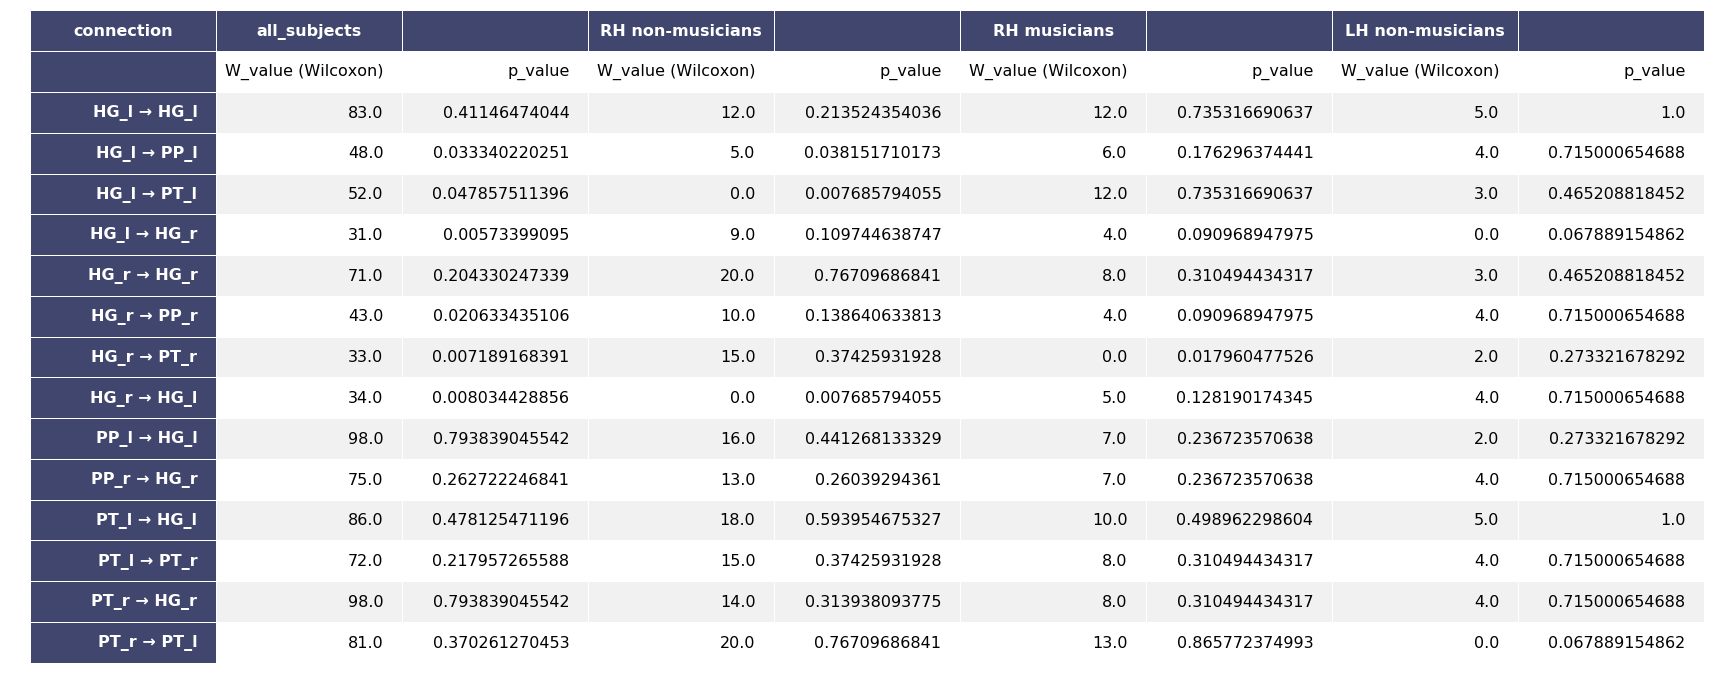

In [117]:
import six


def render_mpl_table(data, col_width=3.0, row_height=0.675, font_size=16,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=1,
                     ax=None, **kwargs):
    if ax is None:
        #size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=(30,12))
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            #cell.set_text_props(weight='bold')
            cell.set_facecolor(row_colors[k[0]%len(row_colors)])
    return ax

figure_1 = render_mpl_table(table_1, header_columns=1, col_width=3.0)

In [118]:
#fig_1 = figure_1.get_figure()
#fig_1.savefig("table_1_endogenous_stat_wilcoxon_4.png")

In [119]:
mux = pd.MultiIndex.from_product([['RH-nM vs. RH-M','RH-nM vs. LH-nM','LH-nM vs. RH-M'], ['p_value']])
df = pd.DataFrame(columns=mux, index=index_A_matrix)

In [120]:
df[('RH-nM vs. RH-M','p_value')] = list_mannwhitney_p_1
df[('RH-nM vs. LH-nM','p_value')] = list_mannwhitney_p_2
df[('LH-nM vs. RH-M','p_value')] = list_mannwhitney_p_3

In [121]:
df

,RH-nM vs. RH-M,RH-nM vs. LH-nM,LH-nM vs. RH-M
,p_value,p_value,p_value
connection,,,
HG_l → HG_l,0.457850,0.349838,0.462360
HG_l → PP_l,0.500000,0.349838,0.254166
HG_l → PT_l,0.298314,0.349838,0.462360
HG_l → HG_r,0.336000,0.469251,0.462360
HG_r → HG_r,0.229359,0.408481,0.462360
HG_r → PP_r,0.262679,0.349838,0.197546
HG_r → PT_r,0.028369,0.469251,0.109651
HG_r → HG_l,0.262679,0.052596,0.197546


In [122]:
df.index.names = ['connection']
df2 = df.reset_index().transpose()
df3 = df2.reset_index()
df3.ix[df3.duplicated('level_0') , 'level_0'] = ''

/home/benedikt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [123]:
df4 = df3.transpose()

In [124]:
df4.columns = df4.iloc[0]

In [125]:
final_table = df4.reindex()

In [139]:
table_2 = final_table.drop(['level_0'])
table_2

level_0,connection,RH-nM vs. RH-M,RH-nM vs. LH-nM,LH-nM vs. RH-M
level_1,,p_value,p_value,p_value
0,HG_l → HG_l,0.45785,0.349838,0.46236
1,HG_l → PP_l,0.5,0.349838,0.254166
2,HG_l → PT_l,0.298314,0.349838,0.46236
3,HG_l → HG_r,0.336,0.469251,0.46236
4,HG_r → HG_r,0.229359,0.408481,0.46236
5,HG_r → PP_r,0.262679,0.349838,0.197546
6,HG_r → PT_r,0.0283691,0.469251,0.109651
7,HG_r → HG_l,0.262679,0.0525963,0.197546
8,PP_l → HG_l,0.0844006,0.349838,0.109651


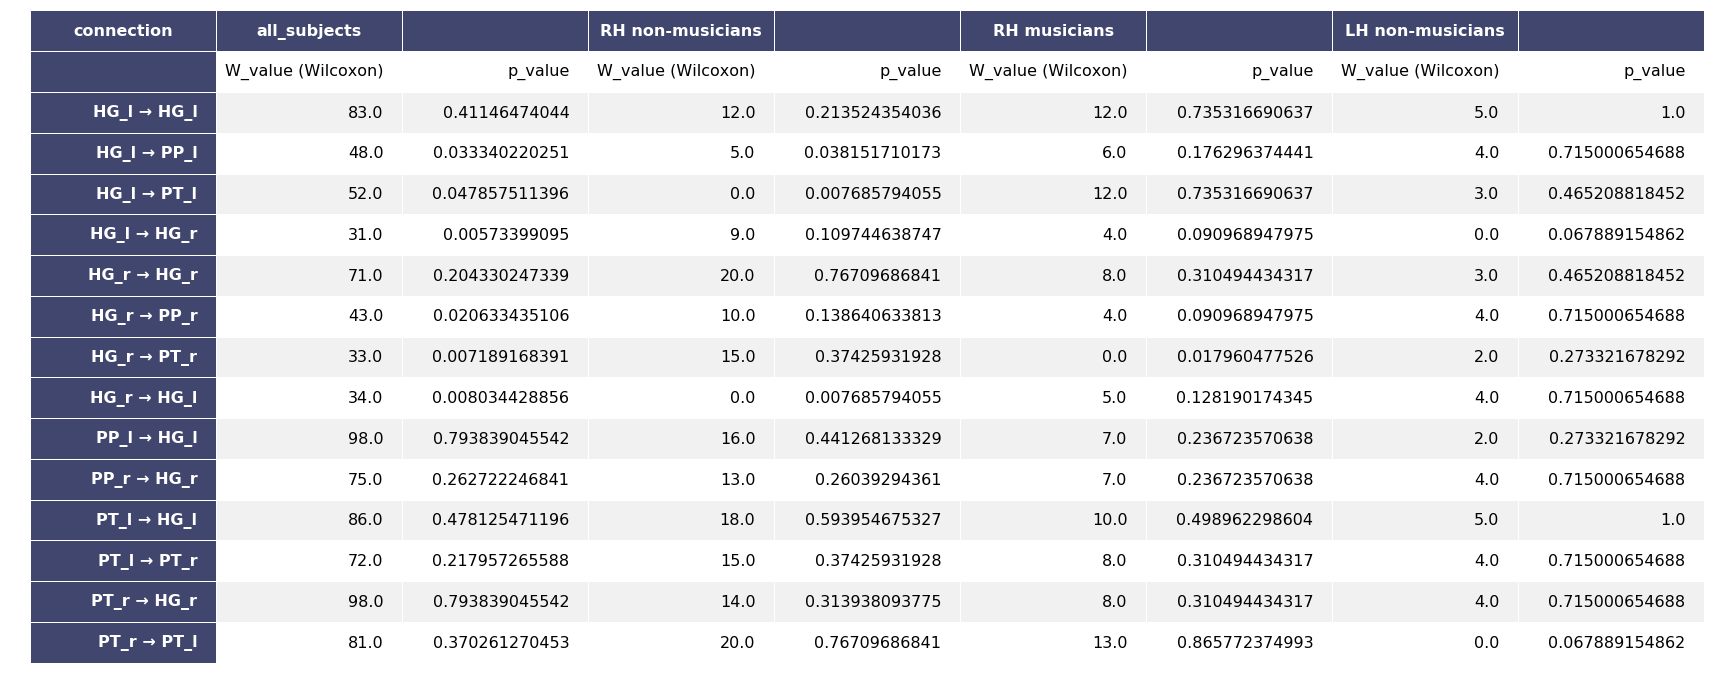

In [117]:
import six


def render_mpl_table(data, col_width=3.0, row_height=0.675, font_size=16,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=1,
                     ax=None, **kwargs):
    if ax is None:
        #size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=(30,12))
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            #cell.set_text_props(weight='bold')
            cell.set_facecolor(row_colors[k[0]%len(row_colors)])
    return ax

figure_1 = render_mpl_table(table_1, header_columns=1, col_width=3.0)

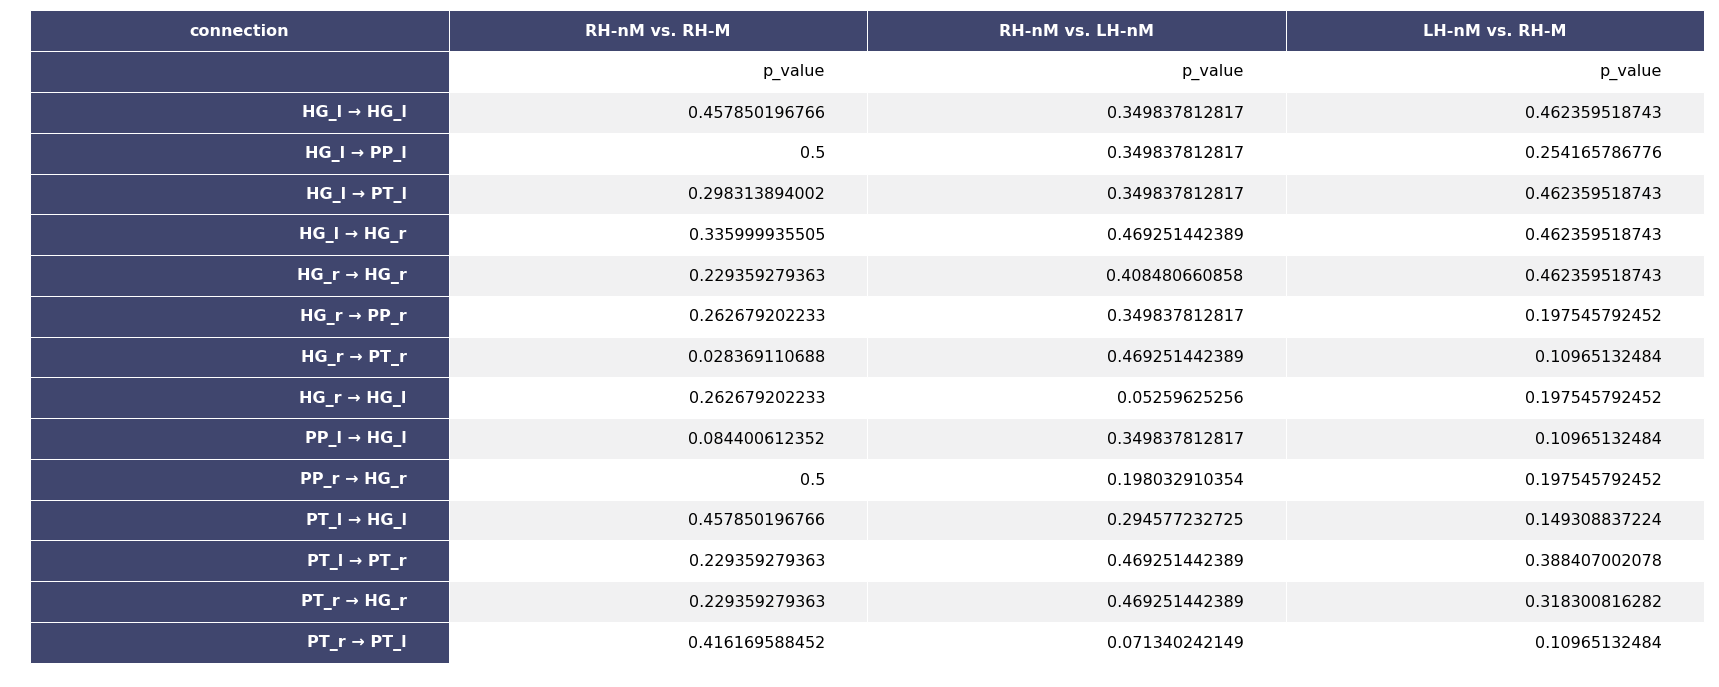

In [127]:
figure_2 = render_mpl_table(table_2, header_columns=1, col_width=3.0)

In [128]:
#fig = figure.get_figure()
#fig.savefig("table.png")

In [129]:
#fig_2 = figure_2.get_figure()
#fig_2.savefig("table_2_endogenous_stat_mannwhitney.png")

### create csvs

In [130]:
mux_2 = pd.MultiIndex.from_product([['all_subjects','RH non-musicians','RH musicians','LH non-musicians'], ['mean', 'std', 'median', 'p_value']])
inspection = pd.DataFrame(columns=mux_2, index=index_A_matrix)

In [131]:
inspection[('all_subjects','median')] = con_params_A_matrix_stats['median']
inspection[('all_subjects','mean')] = con_params_A_matrix_stats['mean'] 
inspection[('all_subjects','std')] = con_params_A_matrix_stats['sd'] 
inspection[('all_subjects','p_value')] = con_params_A_matrix_wilcoxon_stats['p value']

inspection[('RH non-musicians','median')] = con_params_A_matrix_rhnm_stats['median']
inspection[('RH non-musicians','mean')] = con_params_A_matrix_rhnm_stats['mean']
inspection[('RH non-musicians','std')] = con_params_A_matrix_rhnm_stats['sd']
inspection[('RH non-musicians','p_value')] = con_params_A_matrix_rhnm_wilcoxon_stats['p value']

inspection[('RH musicians','median')] = con_params_A_matrix_rhm_stats['median']
inspection[('RH musicians','mean')] = con_params_A_matrix_rhm_stats['mean']
inspection[('RH musicians','std')] = con_params_A_matrix_rhm_stats['sd']
inspection[('RH musicians','p_value')] = con_params_A_matrix_rhm_wilcoxon_stats['p value']

inspection[('LH non-musicians','median')] = con_params_A_matrix_lhnm_stats['median']
inspection[('LH non-musicians','mean')] = con_params_A_matrix_lhnm_stats['mean']
inspection[('LH non-musicians','std')] = con_params_A_matrix_lhnm_stats['sd']
inspection[('LH non-musicians','p_value')] = con_params_A_matrix_lhnm_wilcoxon_stats['p value']

In [132]:
inspection

all_subjects                               RH non-musicians  \
                    mean       std    median   p_value             mean   
connection                                                                
HG_l → HG_l     0.108119  0.416900  0.000186  0.411465         0.065943   
HG_l → PP_l     0.136080  0.334897  0.052675  0.033340         0.181449   
HG_l → PT_l     0.123190  0.463047  0.043277  0.047858         0.188930   
HG_l → HG_r     0.237913  0.331674  0.018807  0.005734         0.197704   
HG_r → HG_r    -0.074285  0.425444 -0.047962  0.204330         0.001785   
HG_r → PP_r     0.159846  0.306448  0.023606  0.020633         0.178341   
HG_r → PT_r     0.272402  0.432828  0.230787  0.007189         0.131540   
HG_r → HG_l     0.205932  0.327496  0.081247  0.008034         0.296424   
PP_l → HG_l     0.042622  0.559577  0.007535  0.793839        -0.076863   
PP_r → HG_r    -0.167249  0.528851 -0.012249  0.262722        -0.219266   
PT_l → HG_l    -0.053673  0.425719 -0.045960  0.478125        -0.115860   
PT_l → PT_r    -0.058396  0.390196 -0.017073  0.217957         0.072649   
PT_r → HG_r    -0.035710  0.427836  0.008134  0.793839         0.033718   
PT_r → PT_l     0.052708  0.245278  0.008166  0.370261        -0.022552   

                                          RH musicians                      \
                  std    median   p_value         mean       std    median   
connection                                                                   
HG_l → HG_l  0.126939  0.000229  0.213524     0.071011  0.318159 -0.000027   
HG_l → PP_l  0.349208  0.047463  0.038152     0.186779  0.318700  0.197596   
HG_l → PT_l  0.200928  0.109896  0.007686    -0.008881  0.455739  0.048779   
HG_l → HG_r  0.314017  0.008454  0.109745     0.292868  0.341002  0.332906   
HG_r → HG_r  0.441218 -0.000081  0.767097    -0.085892  0.497670 -0.137011   
HG_r → PP_r  0.338522  0.008804  0.138641     0.226734  0.330594  0.028299   
HG_r → PT_r  0.472787  0.009117  0.374259     0.501791  0.370914  0.458990   
HG_r → HG_l  0.373903  0.090229  0.007686     0.205947  0.328530  0.222153   
PP_l → HG_l  0.322871  0.008239  0.441268    -0.131193  0.325946 -0.022786   
PP_r → HG_r  0.689690 -0.023131  0.260393    -0.162435  0.338178 -0.054908   
PT_l → HG_l  0.383745  0.007456  0.593955    -0.119846  0.398577 -0.216036   
PT_l → PT_r  0.410112 -0.013952  0.374259    -0.208244  0.419641 -0.280749   
PT_r → HG_r  0.490974  0.008613  0.313938    -0.085221  0.187314 -0.009138   
PT_r → PT_l  0.155426  0.007573  0.767097     0.015721  0.230578  0.007438   

                      LH non-musicians                                
              p_value             mean       std    median   p_value  
connection                                                            
HG_l → HG_l  0.735317         0.267956  0.901519 -0.026291  1.000000  
HG_l → PP_l  0.176296        -0.054724  0.348253  0.033748  0.715001  
HG_l → PT_l  0.735317         0.206402  0.878632  0.022833  0.465209  
HG_l → HG_r  0.090969         0.232215  0.435036  0.018476  0.067889  
HG_r → HG_r  0.310494        -0.225126  0.289589 -0.189553  0.465209  
HG_r → PP_r  0.090969         0.001179  0.159857  0.039270  0.715001  
HG_r → PT_r  0.017960         0.187912  0.351330  0.105508  0.273322  
HG_r → HG_l  0.128190         0.002297  0.103647  0.032469  0.715001  
PP_l → HG_l  0.236724         0.615640  0.970329  0.397224  0.273322  
PP_r → HG_r  0.236724        -0.058637  0.500240  0.046775  0.715001  
PT_l → HG_l  0.498962         0.202050  0.573063 -0.051908  1.000000  
PT_l → PT_r  0.310494        -0.091012  0.241306 -0.055712  0.715001  
PT_r → HG_r  0.310494        -0.105277  0.647805  0.065753  0.715001  
PT_r → PT_l  0.865772         0.286768  0.342113  0.208199  0.067889

In [133]:
allsubs = inspection.iloc[:,0:4]
allsubs
#table_allsubs = allsubs.to_csv('statistics_allsubs.csv')

all_subjects                              
                    mean       std    median   p_value
connection                                            
HG_l → HG_l     0.108119  0.416900  0.000186  0.411465
HG_l → PP_l     0.136080  0.334897  0.052675  0.033340
HG_l → PT_l     0.123190  0.463047  0.043277  0.047858
HG_l → HG_r     0.237913  0.331674  0.018807  0.005734
HG_r → HG_r    -0.074285  0.425444 -0.047962  0.204330
HG_r → PP_r     0.159846  0.306448  0.023606  0.020633
HG_r → PT_r     0.272402  0.432828  0.230787  0.007189
HG_r → HG_l     0.205932  0.327496  0.081247  0.008034
PP_l → HG_l     0.042622  0.559577  0.007535  0.793839
PP_r → HG_r    -0.167249  0.528851 -0.012249  0.262722
PT_l → HG_l    -0.053673  0.425719 -0.045960  0.478125
PT_l → PT_r    -0.058396  0.390196 -0.017073  0.217957
PT_r → HG_r    -0.035710  0.427836  0.008134  0.793839
PT_r → PT_l     0.052708  0.245278  0.008166  0.370261

In [134]:
rhnm = inspection.iloc[:,4:8]
rhnm
#table_rhnm = rhnm.to_csv('statistics_rhnm.csv')

RH non-musicians                              
                        mean       std    median   p_value
connection                                                
HG_l → HG_l         0.065943  0.126939  0.000229  0.213524
HG_l → PP_l         0.181449  0.349208  0.047463  0.038152
HG_l → PT_l         0.188930  0.200928  0.109896  0.007686
HG_l → HG_r         0.197704  0.314017  0.008454  0.109745
HG_r → HG_r         0.001785  0.441218 -0.000081  0.767097
HG_r → PP_r         0.178341  0.338522  0.008804  0.138641
HG_r → PT_r         0.131540  0.472787  0.009117  0.374259
HG_r → HG_l         0.296424  0.373903  0.090229  0.007686
PP_l → HG_l        -0.076863  0.322871  0.008239  0.441268
PP_r → HG_r        -0.219266  0.689690 -0.023131  0.260393
PT_l → HG_l        -0.115860  0.383745  0.007456  0.593955
PT_l → PT_r         0.072649  0.410112 -0.013952  0.374259
PT_r → HG_r         0.033718  0.490974  0.008613  0.313938
PT_r → PT_l        -0.022552  0.155426  0.007573  0.767097

In [135]:
rhm = inspection.iloc[:,8:12]
rhm
#table_rhm = rhm.to_csv('statistics_rhm.csv')

RH musicians                              
                    mean       std    median   p_value
connection                                            
HG_l → HG_l     0.071011  0.318159 -0.000027  0.735317
HG_l → PP_l     0.186779  0.318700  0.197596  0.176296
HG_l → PT_l    -0.008881  0.455739  0.048779  0.735317
HG_l → HG_r     0.292868  0.341002  0.332906  0.090969
HG_r → HG_r    -0.085892  0.497670 -0.137011  0.310494
HG_r → PP_r     0.226734  0.330594  0.028299  0.090969
HG_r → PT_r     0.501791  0.370914  0.458990  0.017960
HG_r → HG_l     0.205947  0.328530  0.222153  0.128190
PP_l → HG_l    -0.131193  0.325946 -0.022786  0.236724
PP_r → HG_r    -0.162435  0.338178 -0.054908  0.236724
PT_l → HG_l    -0.119846  0.398577 -0.216036  0.498962
PT_l → PT_r    -0.208244  0.419641 -0.280749  0.310494
PT_r → HG_r    -0.085221  0.187314 -0.009138  0.310494
PT_r → PT_l     0.015721  0.230578  0.007438  0.865772

In [141]:
lhnm = inspection.iloc[:,12:16]
lhnm
#table_lhnm = lhnm.to_csv('statistics_lhnm.csv')

LH non-musicians                              
                        mean       std    median   p_value
connection                                                
HG_l → HG_l         0.267956  0.901519 -0.026291  1.000000
HG_l → PP_l        -0.054724  0.348253  0.033748  0.715001
HG_l → PT_l         0.206402  0.878632  0.022833  0.465209
HG_l → HG_r         0.232215  0.435036  0.018476  0.067889
HG_r → HG_r        -0.225126  0.289589 -0.189553  0.465209
HG_r → PP_r         0.001179  0.159857  0.039270  0.715001
HG_r → PT_r         0.187912  0.351330  0.105508  0.273322
HG_r → HG_l         0.002297  0.103647  0.032469  0.715001
PP_l → HG_l         0.615640  0.970329  0.397224  0.273322
PP_r → HG_r        -0.058637  0.500240  0.046775  0.715001
PT_l → HG_l         0.202050  0.573063 -0.051908  1.000000
PT_l → PT_r        -0.091012  0.241306 -0.055712  0.715001
PT_r → HG_r        -0.105277  0.647805  0.065753  0.715001
PT_r → PT_l         0.286768  0.342113  0.208199  0.067889

In [195]:
lhnm.index.names = ['connection']
df2 = lhnm.reset_index().transpose()
df2
df3 = df2.reset_index()
df3
df3.ix[df3.duplicated('level_0') , 'level_0'] = '' 

/home/benedikt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [196]:
df3

,level_0,level_1,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,connection,,HG_l → HG_l,HG_l → PP_l,HG_l → PT_l,HG_l → HG_r,HG_r → HG_r,HG_r → PP_r,HG_r → PT_r,HG_r → HG_l,PP_l → HG_l,PP_r → HG_r,PT_l → HG_l,PT_l → PT_r,PT_r → HG_r,PT_r → PT_l
1,LH non-musicians,mean,0.267956,-0.0547236,0.206402,0.232215,-0.225126,0.00117919,0.187912,0.00229737,0.61564,-0.0586367,0.20205,-0.0910123,-0.105277,0.286768
2,,std,0.901519,0.348253,0.878632,0.435036,0.289589,0.159857,0.35133,0.103647,0.970329,0.50024,0.573063,0.241306,0.647805,0.342113
3,,median,-0.0262911,0.0337484,0.0228325,0.0184763,-0.189553,0.0392701,0.105508,0.0324694,0.397224,0.0467751,-0.0519076,-0.055712,0.0657532,0.208199
4,,p_value,1,0.715001,0.465209,0.0678892,0.465209,0.715001,0.273322,0.715001,0.273322,0.715001,1,0.715001,0.715001,0.0678892


In [197]:
df4 = df3.transpose()

In [198]:
df4.columns = df4.iloc[0]

In [199]:
final_table = df4.reindex()

In [200]:
table_2 = final_table.drop(['level_0'])
table_2

level_0,connection,LH non-musicians,,,
level_1,,mean,std,median,p_value
0,HG_l → HG_l,0.267956,0.901519,-0.0262911,1
1,HG_l → PP_l,-0.0547236,0.348253,0.0337484,0.715001
2,HG_l → PT_l,0.206402,0.878632,0.0228325,0.465209
3,HG_l → HG_r,0.232215,0.435036,0.0184763,0.0678892
4,HG_r → HG_r,-0.225126,0.289589,-0.189553,0.465209
5,HG_r → PP_r,0.00117919,0.159857,0.0392701,0.715001
6,HG_r → PT_r,0.187912,0.35133,0.105508,0.273322
7,HG_r → HG_l,0.00229737,0.103647,0.0324694,0.715001
8,PP_l → HG_l,0.61564,0.970329,0.397224,0.273322


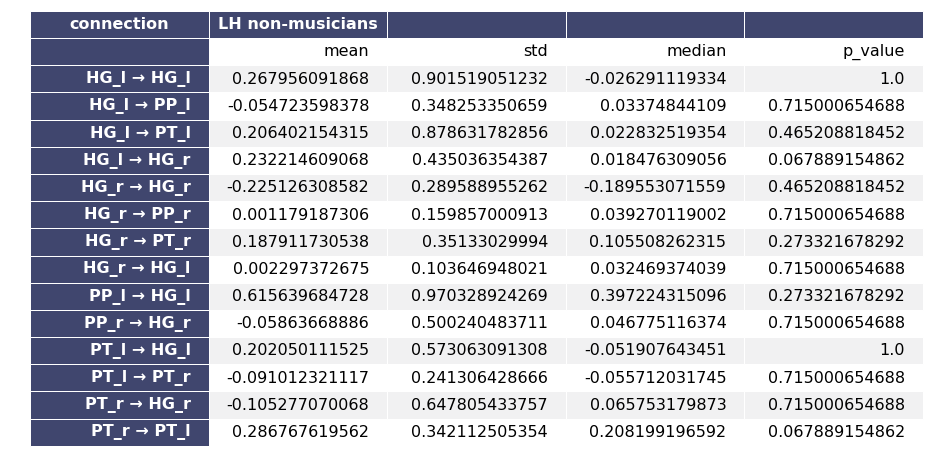

In [201]:
import six


def render_mpl_table(data, col_width=0.2, row_height=1, font_size=16,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=1,
                     ax=None, **kwargs):
    if ax is None:
        #size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=(16,8))
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            #cell.set_text_props(weight='bold')
            cell.set_facecolor(row_colors[k[0]%len(row_colors)])
    return ax

figure_1 = render_mpl_table(table_2, header_columns=1, col_width=0.2)

In [185]:
pwd

'/home/benedikt/Desktop'

In [202]:
fig_1 = figure_1.get_figure()
fig_1.savefig("table-lhnm-endogenous.png")